In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to change default colormap
plt.rcParams["image.cmap"] = "Accent"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Accent.colors)

<function matplotlib.pyplot.show(close=None, block=None)>

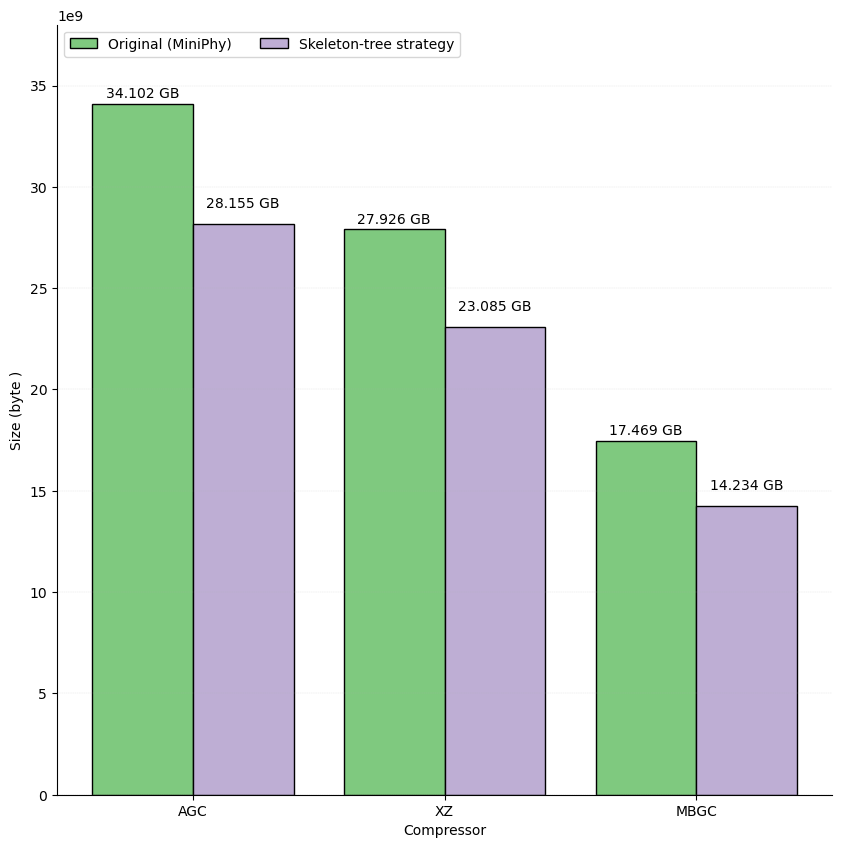

In [10]:
original = [34101791298, 27926192405, 17468621247]
skeleton = [28154924233, 23084674072, 14234094474]

fig, ax = plt.subplots(figsize=(10, 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

names = ['AGC', 'XZ','MBGC']
x = np.arange(len(names)) 
width = 0.4
offset = width * 0
bar_1 = ax.bar(x+offset, original, label='Original (MiniPhy)', edgecolor =  'black', width = width)
offset = width * 1
bar_2 = ax.bar(x+offset, skeleton, label='Skeleton-tree strategy', edgecolor =  'black', width = width)
offset = width * 2

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in original], fontsize = 10,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,3)} GB' for v in skeleton], fontsize = 10, padding = 10)

ax.set_xticks(x + 0.2, names)
ax.set_ylim(0,38000000000)

plt.xlabel("Compressor")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=4)
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y', alpha = 0.4)
plt.show

In [39]:
row_counts = []
with open("data/skeleton_tree_ecoli_25%.tsv") as f:
    for line in f:
        # split on tab, strip newlines
        fields = line.strip().split("\t")
        # ignore empty lines
        if fields != ['']:
            row_counts.append(len(fields))

In [40]:
row_counts

[5,
 9,
 4,
 3,
 1,
 3,
 4,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 21,
 2,
 4,
 2,
 6,
 2,
 1,
 6,
 1,
 1,
 2,
 1,
 4,
 2,
 2,
 1,
 1,
 3,
 4,
 1,
 2,
 1,
 2,
 4,
 1,
 2,
 1,
 1,
 2,
 2,
 5,
 1,
 1,
 3,
 1,
 1,
 9,
 3,
 1,
 3,
 17,
 1,
 19,
 11,
 15,
 14,
 1,
 19,
 13,
 1,
 19,
 9,
 1,
 1,
 9,
 6,
 16,
 2,
 1,
 3,
 10,
 5,
 5,
 1,
 7,
 1,
 2,
 28,
 1,
 4,
 10,
 1,
 9,
 1,
 3,
 6,
 1,
 4,
 1,
 6,
 3,
 9,
 25,
 2,
 3,
 8,
 1,
 5,
 7,
 3,
 5,
 7,
 3,
 6,
 1,
 4,
 6,
 4,
 15,
 18,
 1,
 1,
 1,
 5,
 4,
 1,
 1,
 3,
 2,
 1,
 17,
 1,
 4,
 3,
 6,
 4,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 19,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 18,
 8,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 5,
 8,
 1,
 4,
 7,
 4,
 20,
 1,
 3,
 9,
 1,
 1,
 2,
 3,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 9,
 1,
 14,
 5,
 5,
 1,
 16,
 1,
 3,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 1,
 1,
 3,
 6,
 1,
 2,
 127,
 156,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

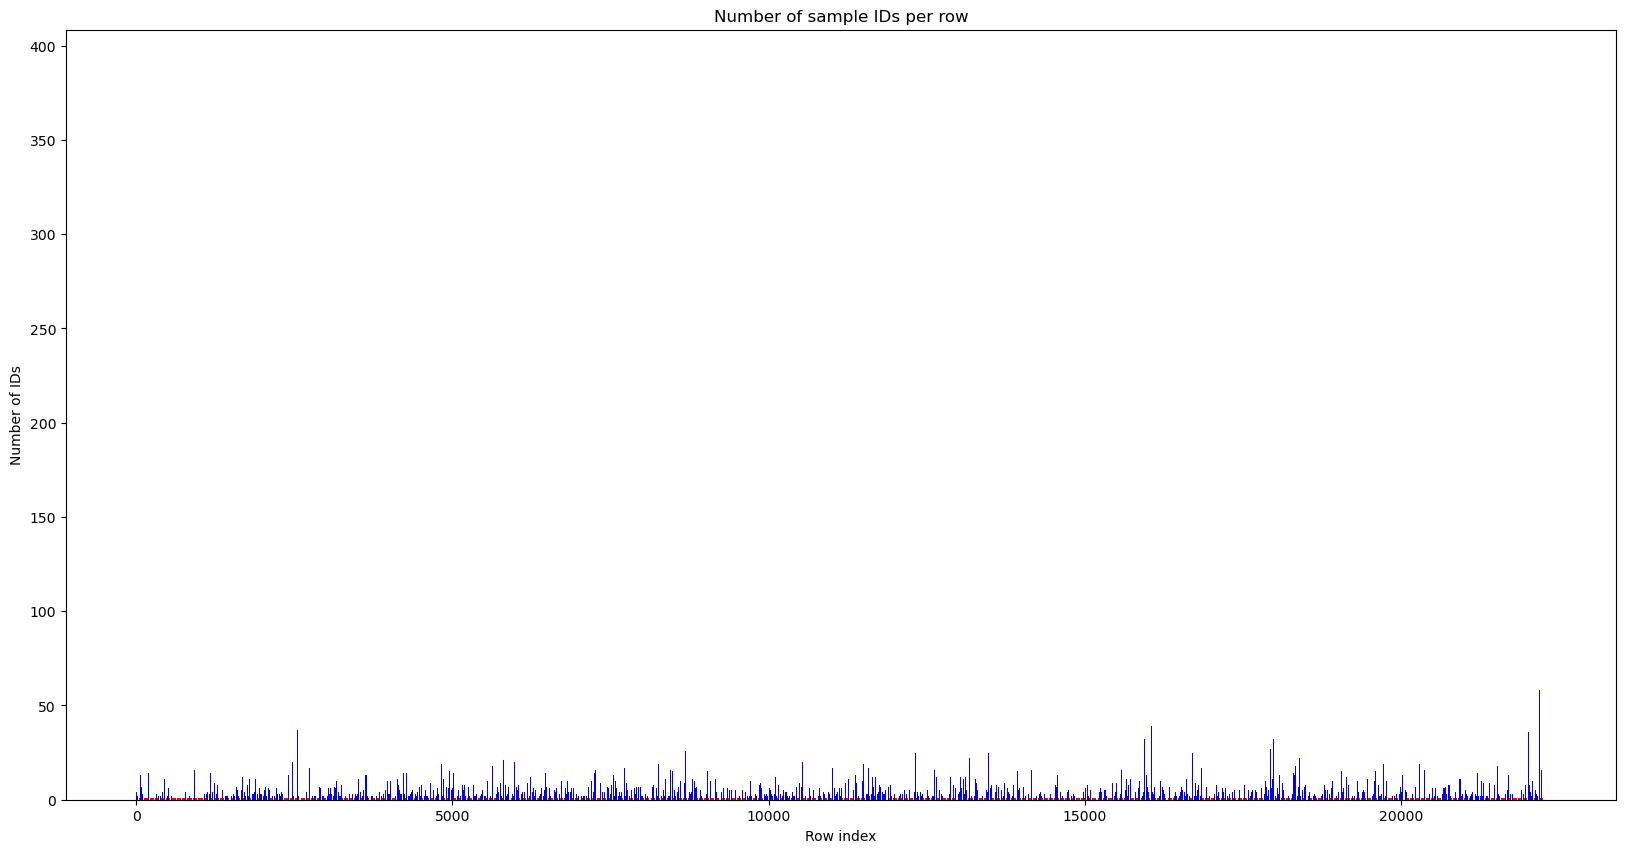

In [41]:
x = list(range(1, len(row_counts)+1))

colors = ["red" if v == 1 else "blue" for v in row_counts]
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x, row_counts, color=colors)
plt.xlabel("Row index")
plt.ylabel("Number of IDs")
plt.title("Number of sample IDs per row")
plt.show()

In [42]:
max(row_counts)

389

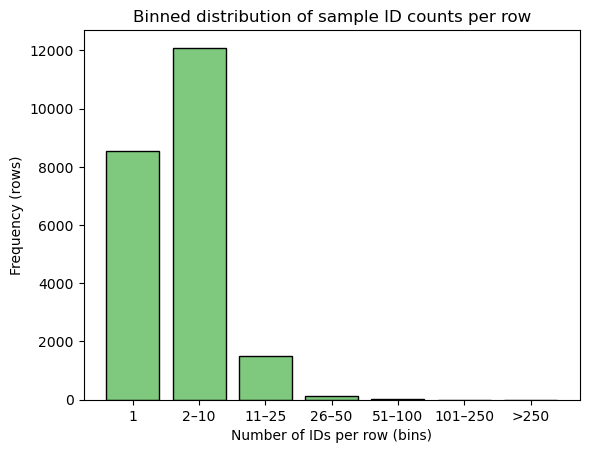

In [43]:
# Define bins
bins = [0, 1, 10, 25, 50, 100, 250, np.inf]
labels = ["1", "2–10", "11–25", "26–50", "51–100", "101–250", ">250"]

# Digitize counts into bins
categories = np.digitize(row_counts, bins, right=True)

# Count frequencies
freqs = [np.sum(categories == i) for i in range(1, len(bins))]

# Plot bar chart
plt.bar(labels, freqs, edgecolor="black")
plt.xlabel("Number of IDs per row (bins)")
plt.ylabel("Frequency (rows)")
plt.title("Binned distribution of sample ID counts per row")
plt.show()

In [44]:
row_counts = []
with open("data/skeleton_tree_ecoli_10%.tsv") as f:
    for line in f:
        # split on tab, strip newlines
        fields = line.strip().split("\t")
        # ignore empty lines
        if fields != ['']:
            row_counts.append(len(fields))

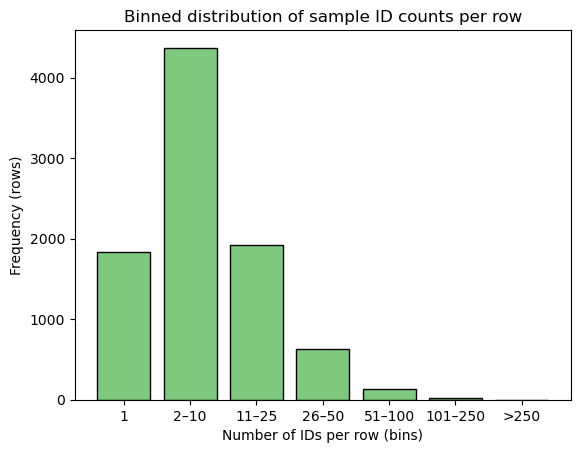

In [45]:
# Define bins
bins = [0, 1, 10, 25, 50, 100, 250, np.inf]
labels = ["1", "2–10", "11–25", "26–50", "51–100", "101–250", ">250"]

# Digitize counts into bins
categories = np.digitize(row_counts, bins, right=True)

# Count frequencies
freqs = [np.sum(categories == i) for i in range(1, len(bins))]

# Plot bar chart
plt.bar(labels, freqs, edgecolor="black")
plt.xlabel("Number of IDs per row (bins)")
plt.ylabel("Frequency (rows)")
plt.title("Binned distribution of sample ID counts per row")
plt.show()

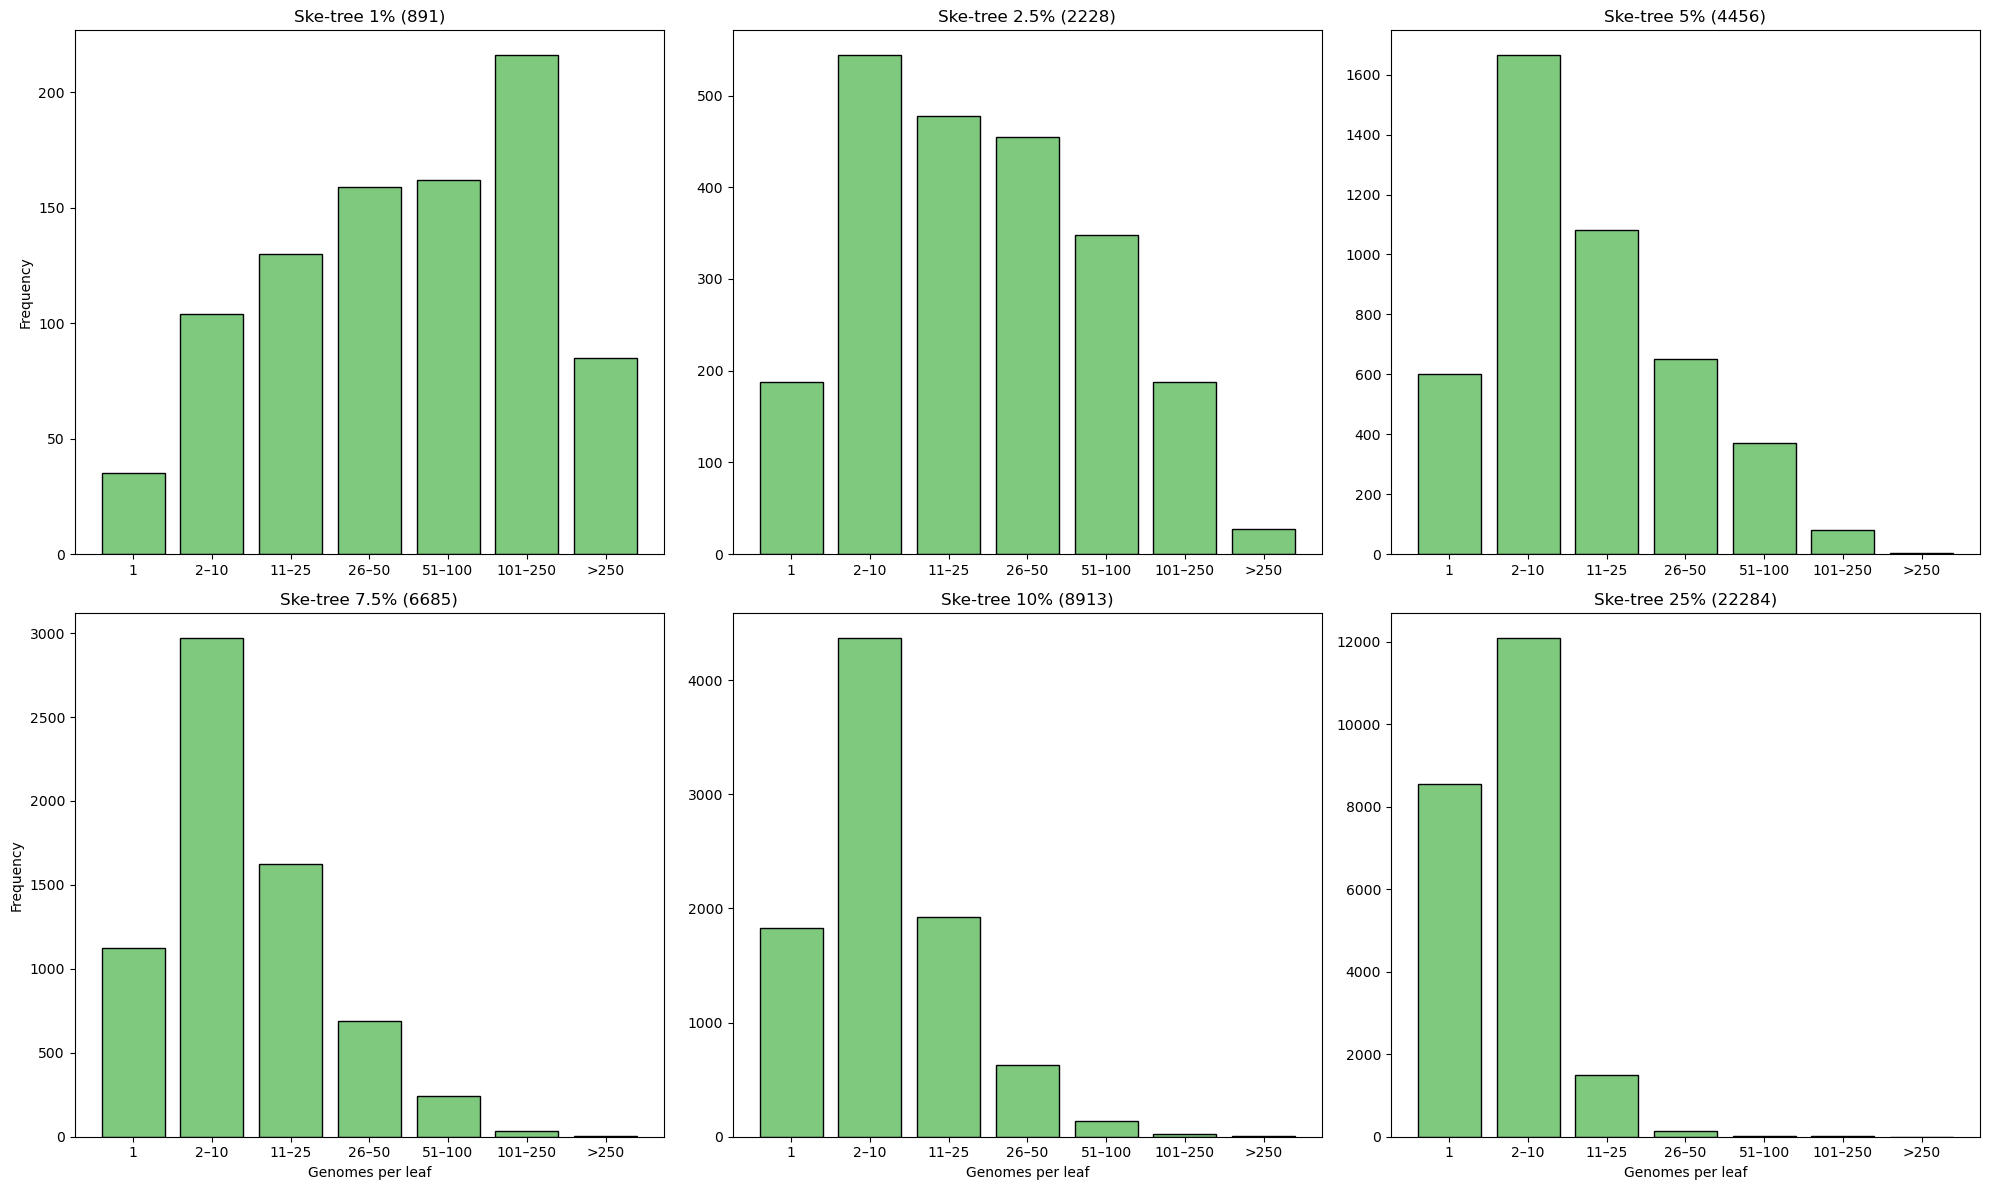

In [79]:
def count_bins(filename):
    row_counts = []
    with open(filename) as f:
        for line in f:
            fields = line.strip().split("\t")
            if fields != ['']:
                row_counts.append(len(fields))

    bins = [0, 1, 10, 25, 50, 100, 250, np.inf]
    labels = ["1", "2–10", "11–25", "26–50", "51–100", "101–250", ">250"]

    categories = np.digitize(row_counts, bins, right=True)
    freqs = [np.sum(categories == i) for i in range(1, len(bins))]
    return labels, freqs

files = [
    "data/skeleton_tree_ecoli_1%.tsv", 
    "data/skeleton_tree_ecoli_2.5%.tsv", 
    "data/skeleton_tree_ecoli_5%.tsv",
    "data/skeleton_tree_ecoli_7.5%.tsv", 
    "data/skeleton_tree_ecoli_10%.tsv", 
    "data/skeleton_tree_ecoli_25%.tsv"
]



names = ['Ske-tree 1%', 'Ske-tree 2.5%', 'Ske-tree 5%', 'Ske-tree 7.5%', 'Ske-tree 10%', 'Ske-tree 25%']

fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharex=False, sharey=False)
axes = axes.flatten()  # flatten to 1D

for ax, file, name in zip(axes.ravel(), files, names):
    labels, freqs = count_bins(file)
    total = sum(freqs)
    ax.bar(labels, freqs, edgecolor="black")
    ax.set_title(f'{name} ({total})')

axes[0].set_ylabel("Frequency")
axes[3].set_ylabel("Frequency")
axes[-3].set_xlabel("Genomes per leaf")
axes[-2].set_xlabel("Genomes per leaf")
axes[-1].set_xlabel("Genomes per leaf")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

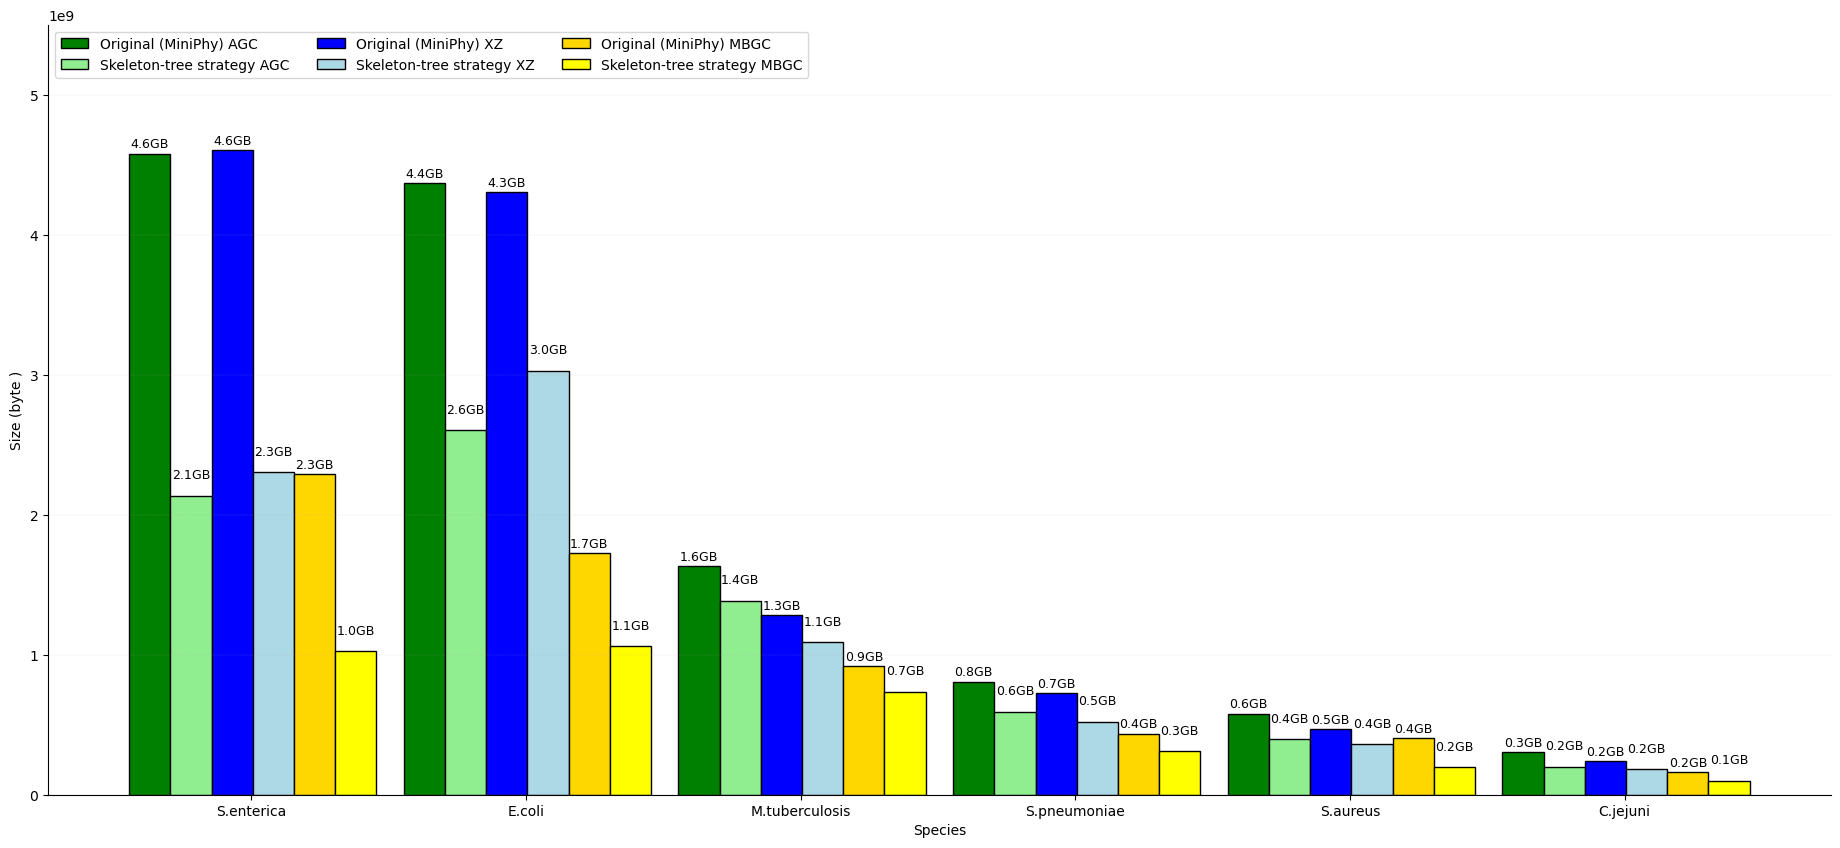

In [128]:
original_agc = [4579602264, 4366487296, 1631497368, 807706284, 579272187, 302317788]
skeleton_agc = [2134300051, 2602894507, 1386743115, 591519002, 397814681, 200658888]
original_xz =  [4604082684, 4301631272, 1282607124, 726682524, 468444344, 241377816]
skeleton_xz =  [2301708612, 3027293636, 1087942588, 522918468, 361260540, 183394596]
original_mbgc =[2288635509, 1725183482, 918566501, 436849826, 402083385, 161080158]
skeleton_mbgc =[1026658472, 1062663065, 737115770, 312392743, 195839320, 99577783]

names = ['S.enterica', 'E.coli','M.tuberculosis','S.pneumoniae','S.aureus','C.jejuni']

fig, ax = plt.subplots(figsize=(23, 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


x = np.arange(len(names)) 
width = 0.15
offset = width * 0
bar_1 = ax.bar(x+offset, original_agc, label='Original (MiniPhy) AGC', edgecolor =  'black', width = width, color='green')
offset = width * 1
bar_2 = ax.bar(x+offset, skeleton_agc, label='Skeleton-tree strategy AGC', edgecolor =  'black', width = width, color='lightgreen')
offset = width * 2
bar_3 = ax.bar(x+offset, original_xz, label='Original (MiniPhy) XZ', edgecolor =  'black', width = width, color='blue')
offset = width * 3
bar_4 = ax.bar(x+offset, skeleton_xz, label='Skeleton-tree strategy XZ', edgecolor =  'black', width = width, color='lightblue')
offset = width * 4
bar_5 = ax.bar(x+offset, original_mbgc, label='Original (MiniPhy) MBGC', edgecolor =  'black', width = width, color='gold')
offset = width * 5
bar_6 = ax.bar(x+offset, skeleton_mbgc, label='Skeleton-tree strategy MBGC', edgecolor =  'black', width = width, color='yellow')
offset = width * 6

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,1)}GB' for v in original_agc], fontsize = 9,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,1)}GB' for v in skeleton_agc], fontsize = 9, padding = 10)
ax.bar_label(bar_3, labels = [f'{round(v/1000000000,1)}GB' for v in original_xz], fontsize = 9,padding = 2)
ax.bar_label(bar_4, labels = [f'{round(v/1000000000,1)}GB' for v in skeleton_xz], fontsize = 9, padding = 10)
ax.bar_label(bar_5, labels = [f'{round(v/1000000000,1)}GB' for v in original_mbgc], fontsize = 9,padding = 2)
ax.bar_label(bar_6, labels = [f'{round(v/1000000000,1)}GB' for v in skeleton_mbgc], fontsize = 9, padding = 10)


ax.set_xticks(x + 0.37, names)
ax.set_ylim(0,5500000000)

plt.xlabel("Species")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=3)
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y', alpha = 0.4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

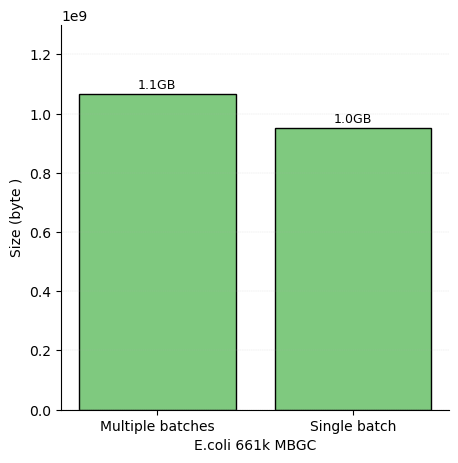

In [118]:
fig, ax = plt.subplots(figsize=(5, 5))
names = ['Multiple batches','Single batch']
counts = [1064962764, 950653519]

bar_container = ax.bar(names, counts, edgecolor = 'black')
ax.set(ylim=(0, 1300000000))
plt.xlabel("E.coli 661k MBGC")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
#ax.legend(loc='upper left', ncols=3)
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y', alpha = 0.4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.bar_label(bar_container, labels = [f'{round(v/1000000000,1)}GB' for v in counts], fontsize = 9,padding = 2)

plt.show

In [125]:
row_counts = []
with open("data/skeleton_tree_ecoli_1%.tsv") as f:
    for line in f:
        # split on tab, strip newlines
        fields = line.strip().split("\t")
        # ignore empty lines
        if fields != ['']:
            row_counts.append(len(fields))

In [126]:
max(row_counts), 

(1665,)

In [124]:
files = [
    "data/skeleton_tree_ecoli_1%.tsv", 
    "data/skeleton_tree_ecoli_2.5%.tsv", 
    "data/skeleton_tree_ecoli_5%.tsv",
    "data/skeleton_tree_ecoli_7.5%.tsv", 
    "data/skeleton_tree_ecoli_10%.tsv", 
    "data/skeleton_tree_ecoli_25%.tsv"
]
def ratio_one(file):
    row_counts = []
    with open(file) as f:
        for line in f:
            fields = line.strip().split("\t")
            if fields != ['']:
                row_counts.append(len(fields))
    row_counts = np.array(row_counts)
    return np.sum(row_counts == 1) / len(row_counts)

ratios = [ratio_one(f) for f in files]

for file, r in zip(files, ratios):
    print(f"{file}: {r:.3f}")

data/skeleton_tree_ecoli_1%.tsv: 0.039
data/skeleton_tree_ecoli_2.5%.tsv: 0.084
data/skeleton_tree_ecoli_5%.tsv: 0.135
data/skeleton_tree_ecoli_7.5%.tsv: 0.168
data/skeleton_tree_ecoli_10%.tsv: 0.205
data/skeleton_tree_ecoli_25%.tsv: 0.384
